In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Advertising.csv",index_col=0)
df

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [4]:
df.describe()
#TV is negatively skewed
#Radio, Newspaper, Sales are positively skewed

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


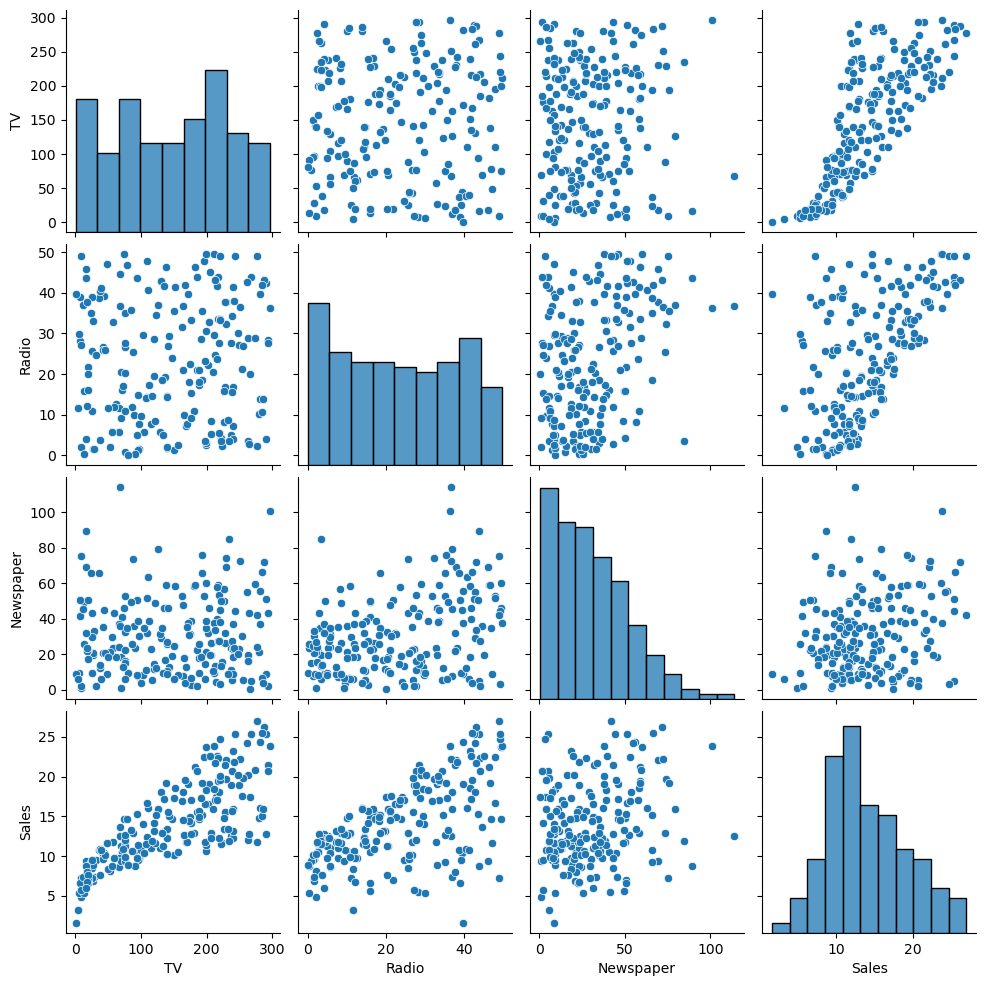

In [5]:
sns.pairplot(df)

<Axes: >

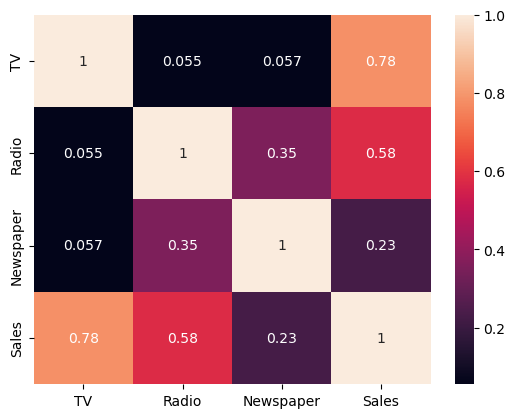

In [6]:
sns.heatmap(df.corr(),annot=True)

In [7]:
features=df.iloc[:,:-1]
target=df.iloc[:,-1]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.3,random_state=1)

In [10]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(140, 3) (60, 3) (140,) (60,)


In [11]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(xtrain,ytrain)
ypred=linreg.predict(xtest)

In [12]:
linreg = LinearRegression()

In [13]:
linreg.fit(xtrain,ytrain)

LinearRegression()

In [14]:
ypred=linreg.predict(xtest)

In [15]:
linreg.coef_

array([0.04695205, 0.17658644, 0.00185115])

In [16]:
pd.DataFrame(linreg.coef_, index=features.columns, columns=["coefficients"])

,coefficients
TV,0.046952
Radio,0.176586
Newspaper,0.001851


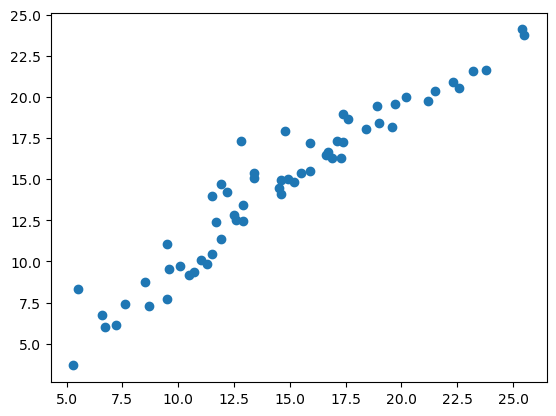

In [17]:
plt.scatter(ytest,ypred)

<Axes: xlabel='Sales', ylabel='Density'>

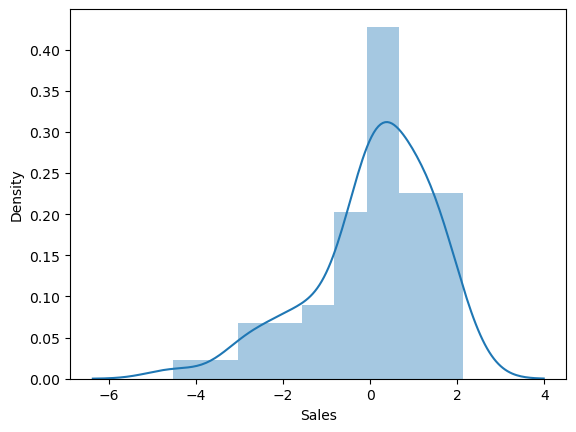

In [18]:
sns.distplot((ytest-ypred))

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
mse = mean_squared_error(ytest,ypred)
mse

1.9289249074665729

In [21]:
r2=r2_score(ytest,ypred)
r2

0.9224605706201435

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
pf = PolynomialFeatures(degree=2)
xtrainp = pf.fit_transform(xtrain)
xtestp = pf.transform(xtest)

In [25]:
linreg.fit(xtrainp,ytrain)

LinearRegression()

In [26]:
ypred=linreg.predict(xtestp)

In [27]:
mse = mean_squared_error(ytest,ypred)
mse

0.2200745632152889

In [28]:
r2=r2_score(ytest,ypred)
r2

0.9911533849831682

<Axes: xlabel='Sales', ylabel='Density'>

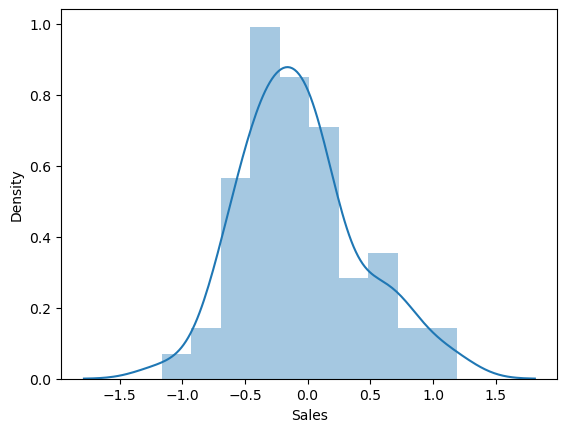

In [29]:
sns.distplot((ytest-ypred))

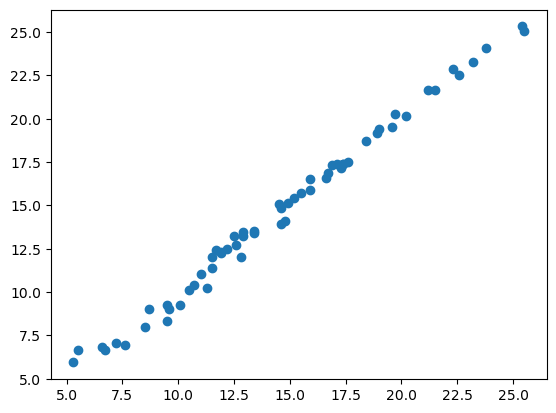

In [30]:
plt.scatter(ytest,ypred)

Bias Variance Tradeoff ->                         
Training error - Bias                      
Testing error - Variance                           
                                        
A - Bias ↑                                   
Variance ↓                                   
                                      
B - Bias ↓                                        
Variance ↑                                     
                                         
C - Bias ↑                                         
Variance ↓                                      
                                              
D - Bias ↓                                             
Variance ↓                                         
                                              
Case A is bad model. (Do not discuss).                                   
Case B is called case of overfitting.                                   
Case C is called case of underfitting.                                           
Case D is the ideal case we need.                                     
                                                     
Bias is the difference between actual values and predicted values, whereas variance tells how scattered the data is with respect to each other.                                               
The number of features that we have in our data set is called complexity.                         
High number of features means high complexity.                             
Low number of features means low complexity.                                    
To get rid of overfitting decrease the number of features and in case of underfitting increase the number of columns or data during training.                                             
Bias Variance Tradeoff says that reducing bias often increases variance and vice versa.                           
Finding the right balance between bias and variance is essential for building models that generalize well to the new data.     
Underfitting occurs when a model has high bias and low variance, here the model fails to capture the underlying patterns in data and perform poorly on the training data.                           
Overfitting occurs when a model has low bias and high variance, here the model captures the noise in the training data and performs well on the training data set but poorly on the testing data set. So for reducing the overfitting we can apply following methods on the model ->                                            
1. Reducing model complexity.                                                 
2. Regularization - Techniques such as : L1 and L2 regularization can penalize overly complex models promoting generalization.
                                       
3. Cross-Validation(K-fold cross validation).                                                    
4. Ensemble Methods - Different ensemble methods like random forest and gradient boosting combines multiple models to reduce variance and improve generalization.                                            
